Pima Imdian Diabetes dataset

In [7]:
import pandas as pd

In [11]:
#reading data
pima = pd.read_csv('diabetes.csv')

In [12]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
#define X with most frequent class
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X = pima[feature_cols]
y = pima.Outcome


In [16]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
#split X and y training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
#train a logistic regression model on the training set 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred_class = logreg.predict(X_test)

In [28]:
from sklearn import metrics

In [29]:
metrics.accuracy_score(y_test, y_pred_class)

0.6770833333333334

In [32]:
#examig the class distribution of the testing set
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [39]:
type(pd.Series(y_pred_class))

pandas.core.series.Series

In [33]:
#precentage of ones
y_test.mean()

0.3229166666666667

In [34]:
#calculate the percentage of zeroes
1 - y_test.mean()

0.6770833333333333

In [35]:
#calculate null accuracy (for multiclass classification problem)
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: Outcome, dtype: float64

compairing the ture and predicted response values

In [53]:
#print the first 30 true and predicted response 
print('True:', y_test.values[0:30])
y_pred = pd.Series(y_pred_class)
print('pred:', y_pred.values[0:30])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


Classification accuracy is the easieast classification metric to understand but it doesn't tell about the understyling distribution of response values .

# Confusion matrix 

Table that describess the performance of a classification model 

In [54]:
#IMPORTANT : first argument is true values adn second arg is predicted 
metrics.confusion_matrix(y_test, y_pred_class)

array([[114,  16],
       [ 46,  16]])

it's 2*2 matrix because there are 2 response classes 

Basic Terminolog
* True Positives(TP): we correctly predicted that they do have diabetes
* True Negatives(TN): we correctly predicted that they don't have diabetes 
* False Positives(FP) : we incorrectly predicted that do have diabetes
* False Negatives(FN) : we incorrectly predicted that don't have diabetes 

In [60]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

## From confusion matrix
##### Classification Accuracy :overall, how often the classifier is correct

In [62]:
print((TP + TN) /float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334
0.6770833333333334


#### Classification Error : Overall , how often is the classifier incorrect 

In [64]:
print((FP+FN)/float(TP+TN+FP+FN))
print(1-metrics.accuracy_score(y_test,y_pred_class))

0.3229166666666667
0.32291666666666663


#### Sensitivity : when the actual value is positive , how often is the prediction correct 
* Detection os positive instances
* Also known as "True Positive Rate" or Recall 

In [66]:
print(TP/float(TP+FN))
print(metrics.recall_score(y_test, y_pred_class))

0.25806451612903225
0.25806451612903225


#### Specificity : When the actual value is negative , how often is the prediction correct 


In [68]:
print(TN/float(TN+FP))

0.8769230769230769


### False Positive rate : When actual value is negative , how often is the prediction incorrect

In [69]:
print(FP/float(TN+FP))

0.12307692307692308


### Precision : when a positive value is predicted , how often is the prediction correct

In [70]:
print(FP/float(FP+TP))

0.5


# Adjusting the classification threshold 

In [71]:
#print the firstt 10 predicted responses 
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [72]:
#print the first 10 predicted probablities of class member 
logreg.predict_proba(X_test)[0:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [76]:
# store the predicted probablities for class 1
y_pred_prob1 = logreg.predict_proba(X_test)[:, 1]

In [74]:
#graphical plot
%matplotlib inline
import matplotlib.pyplot as plt 

Text(0, 0.5, 'Frequency')

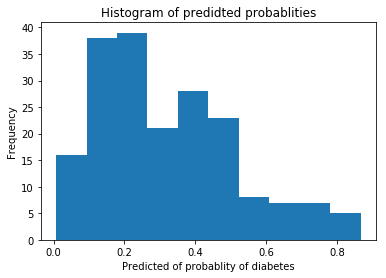

In [79]:
#histogram of predicted probablities 
plt.hist(y_pred_prob1)
#plt.xlim(0,1)
plt.title('Histogram of predidted probablities')
plt.xlabel('Predicted of probablity of diabetes')
plt.ylabel('Frequency')

## Decrease the threshold in order to increase sensitivity of classifier

In [81]:
#predict diabestes if the predicted probabilty is grater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob1], 0.3)[0]

In [83]:
#print the first 10 predicted probablities 
y_pred_prob1[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [84]:
#printed the first 10 predicted classes with lowet threshold 
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [85]:
print(confusion)

[[114  16]
 [ 46  16]]


In [86]:
#new confusion metrics
print(metrics.confusion_matrix(y_test, y_pred_class))

[[82 48]
 [17 45]]


In [87]:
#sensitivy has inceased 
print(45/float(45+17))

0.7258064516129032


In [88]:
#specificity decreases
print(80/float(80+48))

0.625


## Conclusion 
* Threshold of 0.5 is used by default (for binary) to convert predicted probablities into class prediction 
* threshold can be adjusted to increase sensitivity or specificity 
* sensitivity ans specificity have inverse relationship 